# Linear neural networks - torch API

* `data` module for data handling
* `nn` module for model definition
* `optim` for optimization

## Steps to do:

1. get training data
2. prepare data loading
3. define model
4. define optimization procedure
5. train model (and evaluate)

## Problem description

Generate same data as last week: price of flat in Wurzbrug based on its size (in sqm) and time since last renovation (in yrs) - input: $\mathbf{x} \in \mathbb{R}^2$, output: $y \in \mathbb{R}$

In [18]:
# copy data from last week
# --- YOUR CODE HERE ---
import torch
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
# Fix number of data examples (e.g. to 1000)
# --- YOUR CODE HERE ---
num_samples = 1000

# generate random input data
# --- YOUR CODE HERE ---
x1 = torch.normal(mean=70, std=20, size=(num_samples, 1))
x2 = torch.normal(mean=5, std=2, size=(num_samples, 1))

x1 = torch.clamp(sizes, min=20, max=150)
x2 = torch.clamp(years, min=0, max=10)

# make sure the inputs are a single tensor with 2 colums
# --- YOUR CODE HERE ---
x = torch.cat((x1, x2),dim=1)
x.shape

torch.Size([1000, 2])

In [22]:
# fix true parameters for the linear regression
# --- YOUR CODE HERE ---
true_w = torch.tensor([10.0, -20.0])

# bias
# --- YOUR CODE HERE ---
true_b = 100.0

# generate outputs from linear regression model y = x^T w + b + e
# --- YOUR CODE HERE ---
y = torch.matmul(x, true_w) + true_b
y += torch.normal(mean=0, std=5, size=y.shape) #noise e
y = labels.reshape((-1, 1))
y

tensor([[ 660.0267],
        [ 486.2817],
        [ 678.7468],
        [ 752.3424],
        [ 469.0252],
        [ 657.9590],
        [ 589.2352],
        [ 597.3113],
        [ 594.4722],
        [ 583.0502],
        [ 709.0468],
        [ 770.4609],
        [ 937.5617],
        [ 513.0117],
        [ 687.4087],
        [ 496.1805],
        [ 891.7079],
        [ 868.7665],
        [ 844.5881],
        [1013.2884],
        [ 537.3247],
        [ 662.9317],
        [ 771.3079],
        [ 879.2748],
        [ 888.1860],
        [ 372.4957],
        [1005.9581],
        [ 354.5948],
        [ 891.5450],
        [ 401.1349],
        [ 672.3408],
        [ 763.4675],
        [ 981.7567],
        [ 955.7776],
        [ 629.1340],
        [ 781.2806],
        [ 821.3381],
        [ 367.5339],
        [ 607.5875],
        [ 970.6631],
        [1134.5132],
        [ 627.8262],
        [ 687.5062],
        [1000.6369],
        [ 725.1326],
        [ 566.0707],
        [ 470.7019],
        [ 531

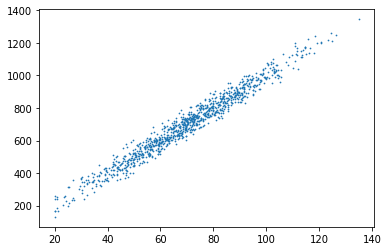

In [23]:
# use matplilib to plot a scatter of price against the size
# --- YOUR CODE HERE ---
plt.scatter(sizes.detach().numpy(), labels.detach().numpy(), .5) # detach tensor graphs and convert to ndarray

### Data loading

Replace own batch generator by `torch.utils.data` API - `DataLoader, TensorDataset` https://pytorch.org/docs/stable/data.html

In [24]:
# use torch data.DataLoader and data.TensorDataset to prepare batch processing
# --- YOUR CODE HERE ---
from torch.utils.data import DataLoader, TensorDataset
dset = TensorDataset(x, y)
dloader = DataLoader(dset, batch_size=32, shuffle=True)

### Iterate through data

Check your dataloader works by iterating once through all the data and printing out the batch at every iteration.

In [25]:
# write a for loop to load batches from data and print out the batches
# --- YOUR CODE HERE ---
for batch in dloader:
    print(batch)

[tensor([[100.5835,   2.1425],
        [ 73.5247,   6.7619],
        [ 72.0263,   6.7995],
        [ 48.2805,   3.1962],
        [ 89.3117,   5.1987],
        [ 62.6465,   6.0620],
        [ 58.3568,   4.3252],
        [ 49.5893,   5.4173],
        [ 77.5251,   6.3141],
        [ 58.8833,   2.4125],
        [ 77.5794,   3.3755],
        [111.0781,   1.8672],
        [ 24.9194,   7.6804],
        [ 95.9186,   8.0136],
        [ 56.9003,   6.3184],
        [ 76.9648,   1.0333],
        [ 75.4207,   6.0253],
        [ 21.0234,   2.5064],
        [ 94.2471,   3.5391],
        [ 65.9606,   4.9686],
        [ 76.2105,   6.7355],
        [ 52.4589,   7.6107],
        [ 88.9693,   5.2883],
        [ 80.0035,   4.2976],
        [ 49.9912,   7.4861],
        [102.3391,   4.6059],
        [ 47.3016,   5.2872],
        [ 34.9303,   2.9860],
        [108.4858,   3.3544],
        [ 76.2208,   3.5769],
        [ 70.3253,   6.7275],
        [ 68.4469,   5.5312]]), tensor([[1066.7039],
        [ 704.64

### Model definition

We still work with linear regression $\hat{y} = \mathbf{x}^T \mathbf{w} + b$ but using `torch.nn` module and the `nn.Linear` layer therein.

In [27]:
# instantiate lin_reg model as linear neural network from torch.nn
# --- YOUR CODE HERE ---
import torch.nn as nn
lin_reg = nn.Linear(2, 1) #cause we have two features and 1 output

In [35]:
# check the parameters initialized automatically and randomly
# --- YOUR CODE HERE ---
for param in lin_reg.parameters():
    print(param) # for nn we have two paramters, weight and bias
    print(param.data) # the actual values of the params
    print(param.grad)

Parameter containing:
tensor([[-0.0547, -0.6500]], requires_grad=True)
tensor([[-0.0547, -0.6500]])
None
Parameter containing:
tensor([-0.2023], requires_grad=True)
tensor([-0.2023])
None


### Loss function definition

We use squared error loss function $\mathcal{L} = \frac{1}{n} \sum_{i = 1}^{n} \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2$ predefined in `torch.nn`

In [36]:
# instantiate loss from torch.nn
# --- YOUR CODE HERE ---
loss_function = nn.MSELoss()

### Optimization algorithm

We use minibatch stochastic gradient descent predefined in the `nn.optim` module.

In [37]:
import torch.optim as optim
optimizer = optim.SGD(lin_reg.parameters(), 0.01)

### Model training

After all the pieces are ready, we implemen the main training loop. It needs to do the following:

* initiate randomly the linear model parameters $(\mathbf{w}, b)$
* repeat for each epoch (unitl done)
    * load batch of data
    * do linear model precitions with current parameter values
    * calculate loss
    * get gradients
    * update parameter values

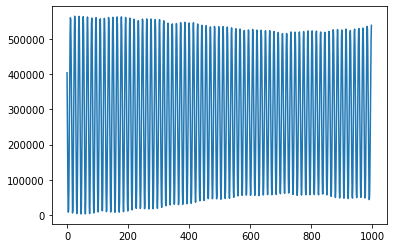

In [51]:
#nochmal, nur damit wir es halt in einer cell haben

# hyperparameters
epochs = 1000
batch_size = 64
learning_rate = 0.0001

#normalization
mn = x.mean(dim=0)
xn = x - mn
xn.mean(dim=0)

std = torch.std(xn, dim=0) #man kann std auch über features berechnen, ist das gleiche
xn = xn/std
xn.std(dim=0)



# data set
dset = TensorDataset(xn, y)
dloader = DataLoader(dset, batch_size, shuffle=True)

# model
lin_reg = nn.Linear(2, 1)

# loss
loss_func = nn.MSELoss()

#optimizer
optimizer = optim.SGD(lin_reg.parameters(), learning_rate)

losses = []

for epoch in range(epochs):
    ll = 0
    for i, (x_batch, y_batch) in enumerate(dloader): #enumarate = count of batches
        y_hat = lin_reg(x_batch)
        loss = loss_func(y_hat, y_batch)
        ll += loss
        loss.backward()
        optimizer.step()
        
    losses.append(ll.item() / i) #average loss
plt.plot(losses[2:])